<a href="https://colab.research.google.com/github/GilbertHD/HD2103/blob/main/HD_05_01_STOCK_PREDICT_SAMSUNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://teddylee777.github.io/tensorflow/lstm-stock-forecast

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

In [ ]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-02-26,82800,83400,82000,82500,38520800,-0.032825
2021-03-02,85100,85300,83000,83600,33498180,0.013333
2021-03-03,83500,84000,82800,84000,19882132,0.004785
2021-03-04,82600,83200,82200,82400,24348331,-0.019048
2021-03-05,81100,82600,81100,82100,20352427,-0.003641


In [ ]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

In [ ]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-02-26,121.26,122.59,124.85,121.20,164560000.0,0.0022
2021-03-01,127.79,123.94,127.92,122.83,116310000.0,0.0539
2021-03-02,125.12,128.59,128.59,125.07,102260000.0,-0.0209
2021-03-03,122.06,124.74,125.66,121.95,112970000.0,-0.0245
2021-03-04,120.13,121.90,123.52,118.63,178150000.0,-0.0158


In [ ]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL', '2017')

In [ ]:
apple.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


In [ ]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')

In [ ]:
ford.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-03-18,1.85,1.85,1.88,1.84,3770000.0,-0.0160
1980-03-19,1.87,1.87,1.88,1.85,1560000.0,0.0108
1980-03-20,1.88,1.88,1.90,1.87,1450000.0,0.0053
1980-03-21,1.80,1.80,1.87,1.78,5020000.0,-0.0426
1980-03-24,1.73,1.73,1.77,1.68,3330000.0,-0.0389


In [ ]:
ford.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-12-23,9.44,9.50,9.57,9.40,54800000.0,-0.0042
2019-12-24,9.47,9.44,9.49,9.43,11880000.0,0.0032
2019-12-26,9.45,9.47,9.49,9.43,28980000.0,-0.0021
2019-12-27,9.36,9.45,9.46,9.35,28270000.0,-0.0095
2019-12-30,9.25,9.34,9.35,9.23,36090000.0,-0.0118


In [ ]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [ ]:
stock = fdr.DataReader(STOCK_CODE)

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-03-17,971,978,951,978,64070,NaN
1997-03-18,987,996,972,996,99602,0.018405
1997-03-19,987,988,960,987,56270,-0.009036
1997-03-20,978,1013,964,1007,116630,0.020263
1997-03-21,988,1004,980,993,95580,-0.013903


In [ ]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-02-26,82800,83400,82000,82500,38520800,-0.032825
2021-03-02,85100,85300,83000,83600,33498180,0.013333
2021-03-03,83500,84000,82800,84000,19882132,0.004785
2021-03-04,82600,83200,82200,82400,24348331,-0.019048
2021-03-05,81100,82600,81100,82100,20352427,-0.003641


In [ ]:
stock.index

DatetimeIndex(['1997-03-17', '1997-03-18', '1997-03-19', '1997-03-20',
               '1997-03-21', '1997-03-22', '1997-03-24', '1997-03-25',
               '1997-03-26', '1997-03-27',
               ...
               '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26', '2021-03-02', '2021-03-03',
               '2021-03-04', '2021-03-05'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [ ]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-03-17,971,978,951,978,64070,NaN,1997,3,17
1997-03-18,987,996,972,996,99602,0.018405,1997,3,18
1997-03-19,987,988,960,987,56270,-0.009036,1997,3,19
1997-03-20,978,1013,964,1007,116630,0.020263,1997,3,20
1997-03-21,988,1004,980,993,95580,-0.013903,1997,3,21


Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


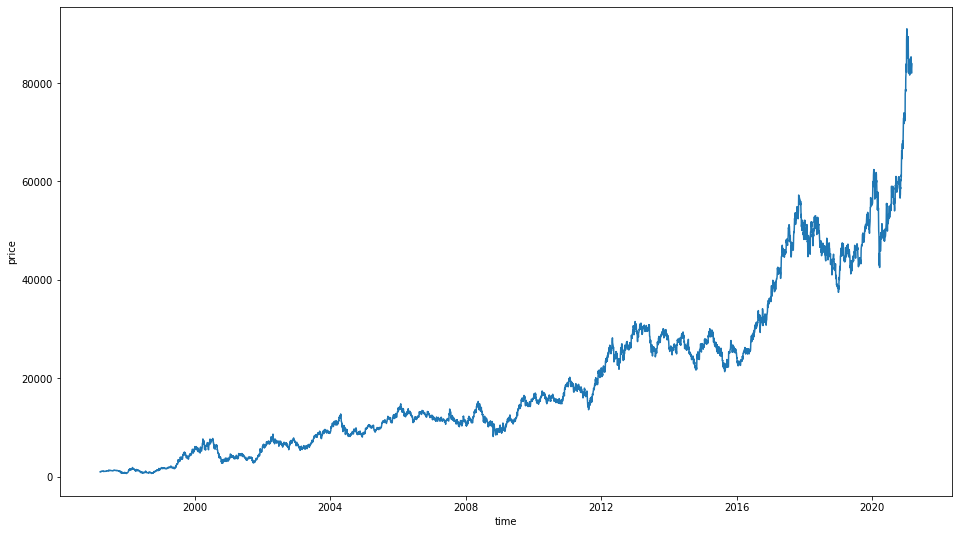

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


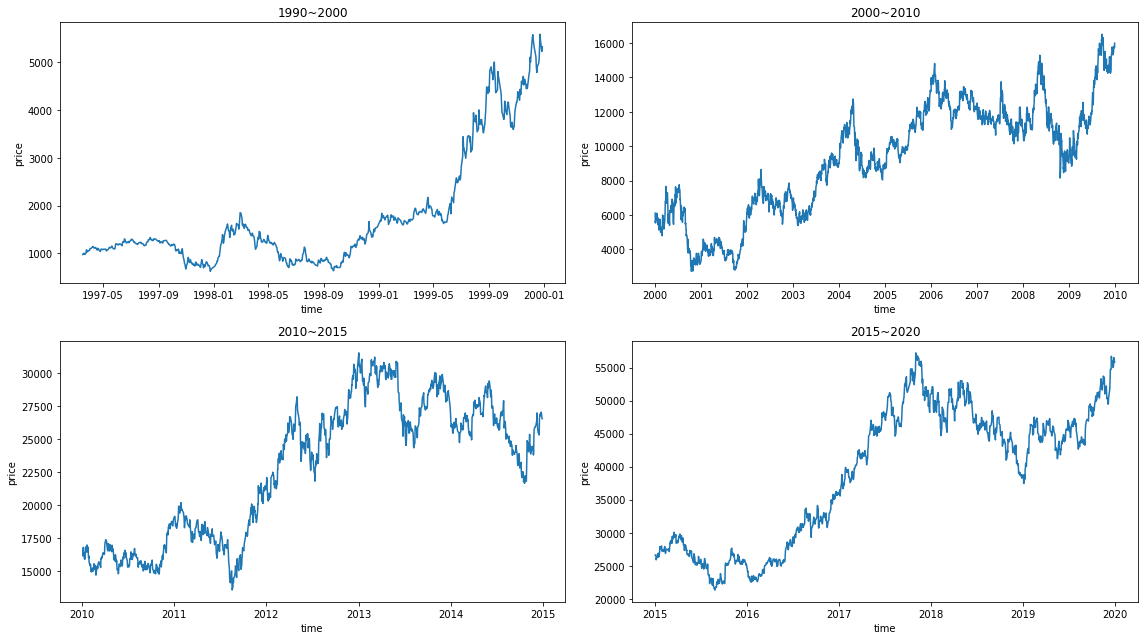

In [ ]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[1.07530454e-02, 1.01033058e-02, 1.06256983e-02, 3.88390338e-03,
        7.09475278e-04],
       [1.09302326e-02, 1.02892562e-02, 1.08603352e-02, 4.08307791e-03,
        1.10293673e-03],
       [1.09302326e-02, 1.02066116e-02, 1.07262570e-02, 3.98349064e-03,
        6.23102448e-04],
       ...,
       [9.24695460e-01, 8.67768595e-01, 9.25139665e-01, 9.22543237e-01,
        2.20163589e-01],
       [9.14728682e-01, 8.59504132e-01, 9.18435754e-01, 9.04838835e-01,
        2.69619774e-01],
       [8.98117386e-01, 8.53305785e-01, 9.06145251e-01, 9.01519259e-01,
        2.25371372e-01]])

In [ ]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [ ]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [ ]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [ ]:
x_train

,Open,High,Low,Volume
0,0.010753,0.010103,0.010626,0.000709
1,0.010930,0.010289,0.010860,0.001103
2,0.010930,0.010207,0.010726,0.000623
3,0.010831,0.010465,0.010771,0.001291
4,0.010941,0.010372,0.010950,0.001058
...,...,...,...,...
4795,0.287929,0.268595,0.281117,0.002866
4796,0.281063,0.262190,0.277095,0.002789
4797,0.275969,0.262603,0.278436,0.001336
4798,0.281285,0.264669,0.282905,0.001484


In [ ]:
import tensorflow as tf

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 35s 11ms/step - loss: 4.7834e-05 - mse: 9.5668e-05 - val_loss: 0.0018 - val_mse: 0.0035

Epoch 00001: val_loss improved from inf to 0.00177, saving model to tmp/ckeckpointer.ckpt
Epoch 2/50
150/150 [==============================] - 1s 7ms/step - loss: 1.1073e-05 - mse: 2.2146e-05 - val_loss: 0.0020 - val_mse: 0.0041

Epoch 00002: val_loss did not improve from 0.00177
Epoch 3/50
150/150 [==============================] - 1s 6ms/step - loss: 1.0059e-05 - mse: 2.0119e-05 - val_loss: 0.0019 - val_mse: 0.0037

Epoch 00003: val_loss did not improve from 0.00177
Epoch 4/50
150/150 [==============================] - 1s 6ms/step - loss: 9.7815e-06 - mse: 1.9563e-05 - val_loss: 0.0026 - val_mse: 0.0052

Epoch 00004: val_loss did not improve from 0.00177
Epoch 5/50
150/150 [==============================] - 1s 6ms/step - loss: 1.0556e-05 - mse: 2.1111e-05 - val_loss: 0.0017 - val_mse: 0.0034

Epoch 00005: val_loss improved from 0.00177 to 0.0

In [ ]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_data)

In [ ]:
pred.shape

(1180, 1)

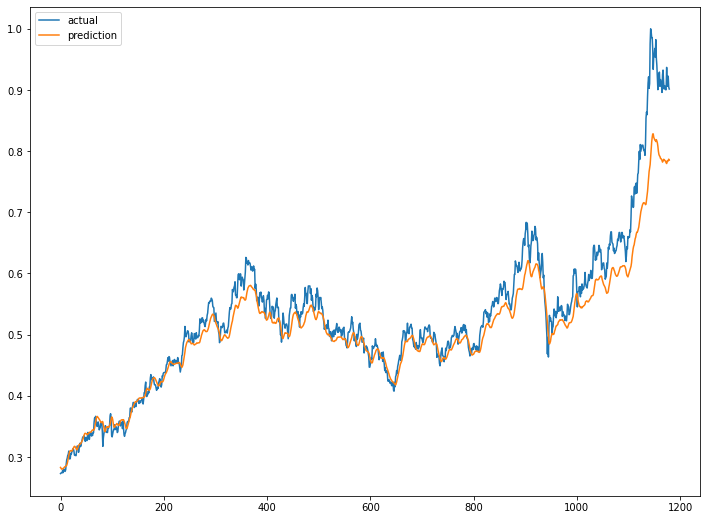

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()